In [1]:
# Libraries

import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
import matplotlib.ticker as ticker
from statsmodels.tsa.stattools import adfuller

In [2]:
# Available datasets
datasets = [
    "customers_dataset.csv",
    "geolocation_dataset.csv",
    "order_items_dataset.csv",
    "order_payments_dataset.csv",
    "order_reviews_dataset.csv",
    "orders_dataset.csv",
    "products_dataset.csv",
    "sellers_dataset.csv",
    "product_category_name_translation.csv"
]

#  Printig informations
for dataset in datasets:
    print(f"\n\nDataset: {dataset}")

    df = pd.read_csv(dataset)

    # Display
    display(df.head(10))

    # List columns
    print("\nKolom:", df.columns.tolist())



Dataset: customers_dataset.csv


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG



Kolom: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


Dataset: geolocation_dataset.csv


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP



Kolom: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']


Dataset: order_items_dataset.csv


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40



Kolom: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


Dataset: order_payments_dataset.csv


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95



Kolom: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']


Dataset: order_reviews_dataset.csv


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47



Kolom: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


Dataset: orders_dataset.csv


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00



Kolom: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


Dataset: products_dataset.csv


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0



Kolom: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


Dataset: sellers_dataset.csv


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR



Kolom: ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']


Dataset: product_category_name_translation.csv


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts



Kolom: ['product_category_name', 'product_category_name_english']


**General Data Pre-processing**

In [3]:
# Reading the datasets
customers = pd.read_csv("customers_dataset.csv")
orders = pd.read_csv("orders_dataset.csv")
order_items = pd.read_csv("order_items_dataset.csv")
order_payments = pd.read_csv("order_payments_dataset.csv")
order_reviews = pd.read_csv("order_reviews_dataset.csv")
sellers = pd.read_csv("sellers_dataset.csv")

# Merging the datasets
merged_data = (
    order_items
    .merge(order_payments, on='order_id', how='left')
    .merge(order_reviews, on='order_id', how='left')
    .merge(sellers, on='seller_id', how='left')
    .merge(orders[['order_id', 'customer_id']], on='order_id', how='left')  # Adding customer_id to the merged data
    .merge(customers[['customer_id', 'customer_city', 'customer_state']], on='customer_id', how='left')  # Adding customer_city and customer_state
)

In [4]:
# Columns to be dropped
columns_to_drop = [
    'order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
    'payment_sequential', 'payment_installments', 'review_comment_title',
    'review_creation_date', 'review_answer_timestamp', 'seller_zip_code_prefix', 'review_id', 'customer_id'
]

# Drop the columns
merged_data = merged_data.drop(columns=columns_to_drop)

# Display the first 15 rows of the updated merged_data dataset
from IPython.display import display
display(merged_data.head(15))

,price,freight_value,payment_type,payment_value,review_score,review_comment_message,seller_city,seller_state,customer_city,customer_state
0,58.90,13.29,credit_card,72.19,5.0,"Perfeito, produto entregue antes do combinado.",volta redonda,SP,campos dos goytacazes,RJ
1,239.90,19.93,credit_card,259.83,4.0,NaN,sao paulo,SP,santa fe do sul,SP
2,199.00,17.87,credit_card,216.87,5.0,Chegou antes do prazo previsto e o produto sur...,borda da mata,MG,para de minas,MG
3,12.99,12.79,credit_card,25.78,4.0,NaN,franca,SP,atibaia,SP
4,199.90,18.14,credit_card,218.04,5.0,Gostei pois veio no prazo determinado .,loanda,PR,varzea paulista,SP
5,21.90,12.69,boleto,34.59,4.0,NaN,ribeirao preto,SP,uberaba,MG
6,19.90,11.85,credit_card,31.75,4.0,NaN,sao paulo,SP,guararapes,SP
7,810.00,70.75,credit_card,880.75,5.0,NaN,presidente prudente,SP,praia grande,SP
8,145.95,11.65,credit_card,157.60,1.0,Na descrição do produto quando fui efetuar a c...,sao paulo,SP,santos,SP
9,53.99,11.40,credit_card,65.39,4.0,NaN,sao paulo,SP,jandira,SP


**Review Scores Analysis**
Let's visualize the distribution of review scores in the merged_data dataset. After cleaning the data to exclude missing review scores, we need to count the occurrences of each score and displays the results as a bar plot.

To analyze:

1. Review Distribution: Examine the height of each bar. The taller the bar, the more frequently that score was given by customers.
2. Common Scores: Bars that are notably taller signify scores that are more common. For instance, if the bar for score "5" is the tallest, most reviews are positive.
3. Areas of Improvement: If lower scores (e.g., 1 or 2) have significant counts, it indicates areas where the service or product might be lacking and needs attention.
4. Overall Satisfaction: An overall view can give a sense of customer satisfaction. A skewed distribution towards higher scores means general contentment.


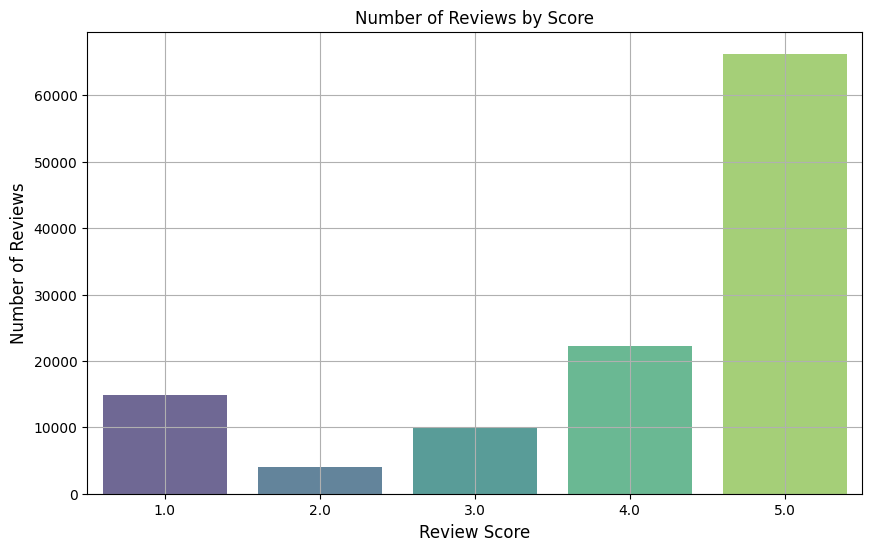

In [6]:
# Remove rows with NaN in the 'review_score' column
merged_data_clean = merged_data.dropna(subset=['review_score'])

# Count the number of occurrences of each review score
score_counts = merged_data_clean['review_score'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=score_counts.index, y=score_counts.values, alpha=0.8, palette='viridis')
plt.title('Number of Reviews by Score')
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Review Score', fontsize=12)
plt.grid()
plt.show()

In [7]:
# Reading the datasets again
customers = pd.read_csv("customers_dataset.csv")
orders = pd.read_csv("orders_dataset.csv")
order_items = pd.read_csv("order_items_dataset.csv")
order_payments = pd.read_csv("order_payments_dataset.csv")
order_reviews = pd.read_csv("order_reviews_dataset.csv")
sellers = pd.read_csv("sellers_dataset.csv")

# Merging the datasets
merged_data = (
    order_items
    .merge(order_payments, on='order_id', how='left')
    .merge(order_reviews, on='order_id', how='left')
    .merge(sellers, on='seller_id', how='left')
    .merge(orders[['order_id', 'customer_id']], on='order_id', how='left')  # Adding customer_id to the merged data
    .merge(customers[['customer_id', 'customer_city', 'customer_state']], on='customer_id', how='left')  # Adding customer_city and customer_state
)

# Columns to be dropped
columns_to_drop = [
    'order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
    'payment_sequential', 'payment_installments', 'review_comment_title',
    'review_creation_date', 'review_answer_timestamp', 'seller_zip_code_prefix', 'review_id', 'customer_id','review_score','review_comment_message'
]

# Drop the columns
merged_data = merged_data.drop(columns=columns_to_drop)

# Display the first 15 rows of the updated merged_data dataset
from IPython.display import display
display(merged_data.head(15))

,price,freight_value,payment_type,payment_value,seller_city,seller_state,customer_city,customer_state
0,58.90,13.29,credit_card,72.19,volta redonda,SP,campos dos goytacazes,RJ
1,239.90,19.93,credit_card,259.83,sao paulo,SP,santa fe do sul,SP
2,199.00,17.87,credit_card,216.87,borda da mata,MG,para de minas,MG
3,12.99,12.79,credit_card,25.78,franca,SP,atibaia,SP
4,199.90,18.14,credit_card,218.04,loanda,PR,varzea paulista,SP
5,21.90,12.69,boleto,34.59,ribeirao preto,SP,uberaba,MG
6,19.90,11.85,credit_card,31.75,sao paulo,SP,guararapes,SP
7,810.00,70.75,credit_card,880.75,presidente prudente,SP,praia grande,SP
8,145.95,11.65,credit_card,157.60,sao paulo,SP,santos,SP
9,53.99,11.40,credit_card,65.39,sao paulo,SP,jandira,SP


**Payment Type Visualization**

From this plot, businesses can understand customer payment preferences, potentially optimizing operations or sales strategies based on preferred payment methods.

1. Popular Payment Methods: Observe which bars are tallest. This indicates which payment methods are most commonly used by customers.
2. Less Common Methods: Shorter bars represent less frequently used payment methods. These might be areas where you could potentially increase marketing or offer incentives to boost usage if desired.
3. Strategic Decisions: If a less popular method is costly for the business to maintain, it may warrant reconsideration.

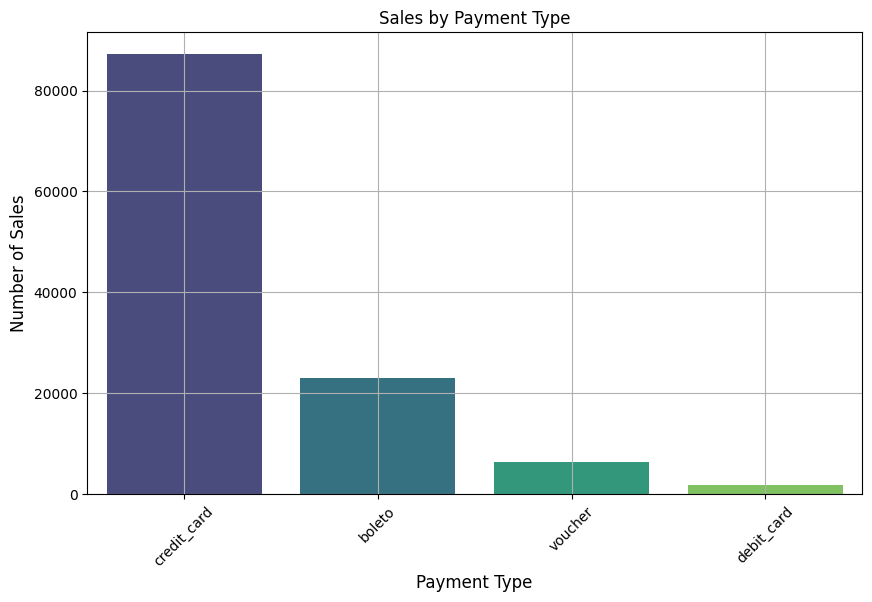

In [8]:
# Payment Type Analysis
payment_type_counts = merged_data['payment_type'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='viridis')
plt.title('Sales by Payment Type')
plt.ylabel('Number of Sales', fontsize=12)
plt.xlabel('Payment Type', fontsize=12)
plt.grid()
plt.xticks(rotation=45)
plt.show()

**Customer Local Visualization**

In [9]:
# Load the olist_geolocation_dataset.csv
geolocation_data = pd.read_csv("geolocation_dataset.csv")

sample_geo_data = geolocation_data.sample(frac=0.05)

# Fetch the coordinates
coords = sample_geo_data[['geolocation_lat', 'geolocation_lng']].values.tolist()

# Create a map centered on Brazil
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Add the heatmap layer
HeatMap(coords, radius=10).add_to(m)

# Display the map
m

**Shipment Data Visual**

showcases shipping routes from sellers to customers, using a sample of 500 transactions from the merged dataset.

In [10]:
# Shipment Analysis

# Sample the merged data for the sake of visualization
sample_merged = merged_data.sample(500)

# Create a new map centered on Brazil
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# For each row in our sample data, draw a line from the seller to the customer
for index, row in sample_merged.iterrows():
    # Fetch seller coordinates
    seller_coords = geolocation_data[geolocation_data['geolocation_city'] == row['seller_city']][['geolocation_lat', 'geolocation_lng']].mean().values.tolist()
    # Fetch customer coordinates
    customer_coords = geolocation_data[geolocation_data['geolocation_city'] == row['customer_city']][['geolocation_lat', 'geolocation_lng']].mean().values.tolist()

    # Check if both seller and customer coordinates are valid (not NaN)
    if not any(pd.isna(seller_coords)) and not any(pd.isna(customer_coords)):
        # Create a line connecting seller and customer
        folium.PolyLine([seller_coords, customer_coords], color="Red", weight=0.5, opacity=0.5).add_to(m)

# Display the map
m

**Sales Revenue Data**

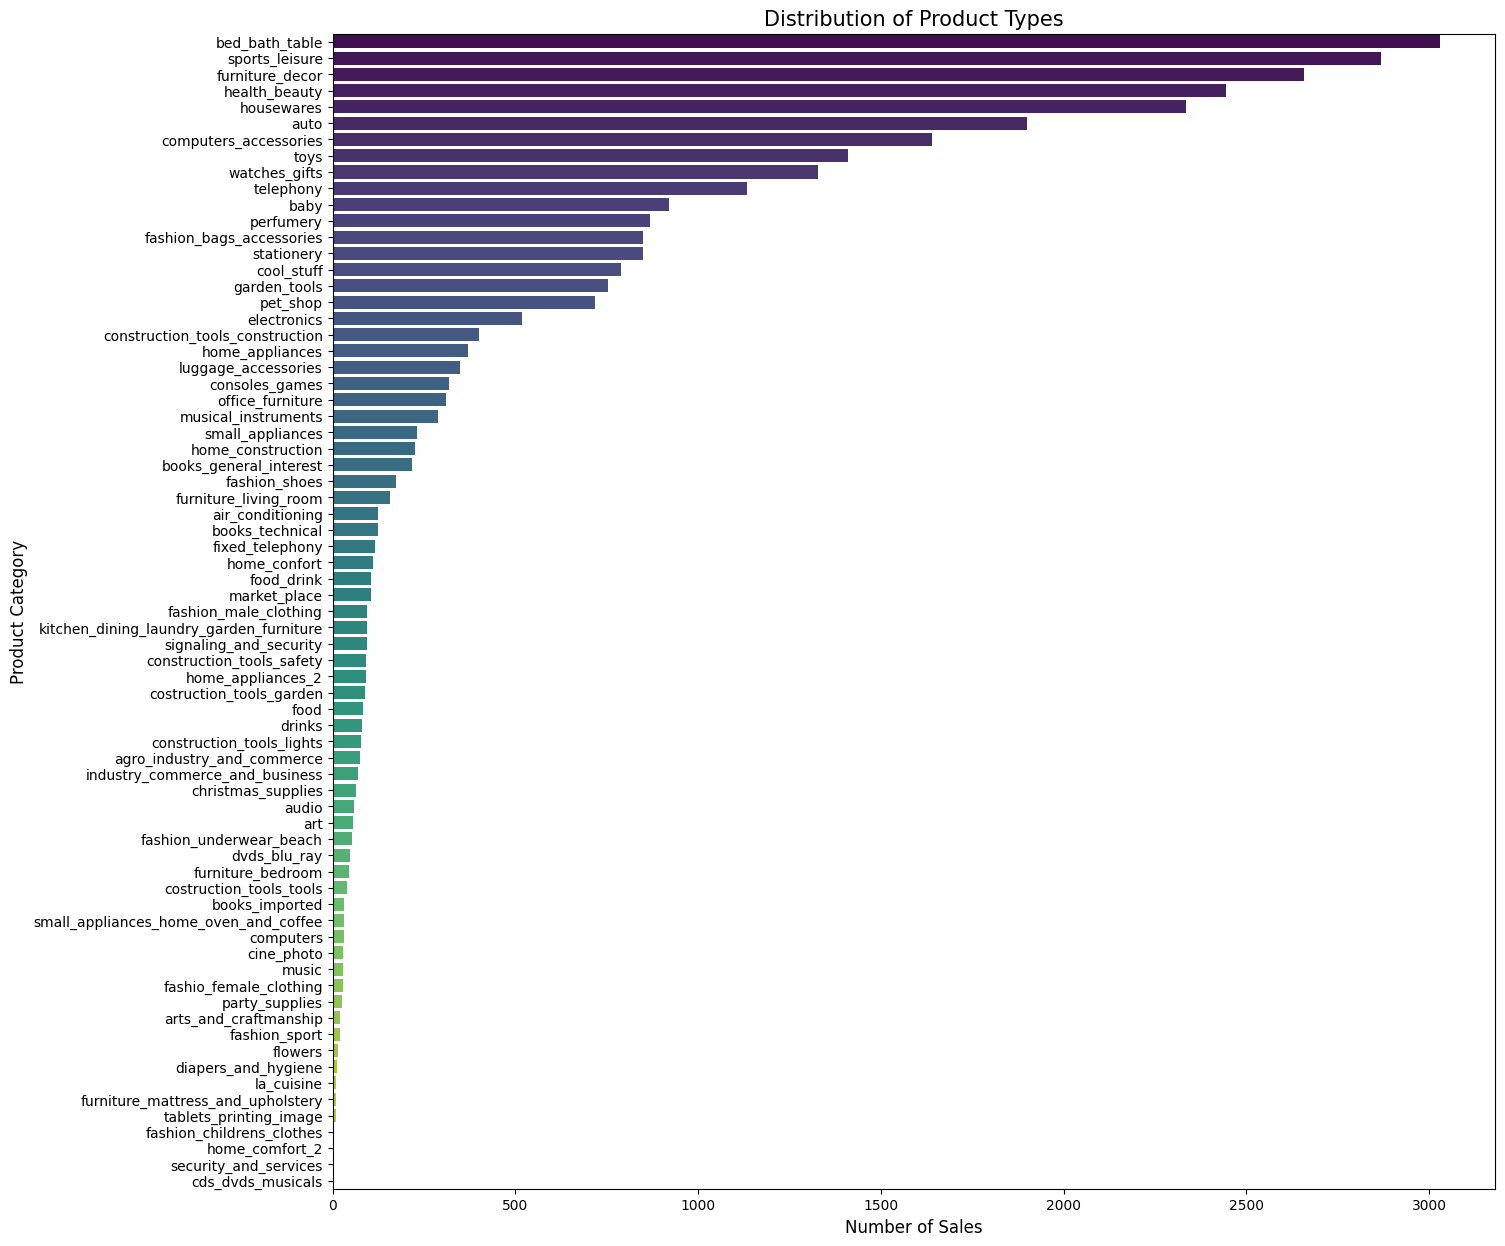

In [11]:
# Load datasets
products = pd.read_csv("products_dataset.csv")
category_translation = pd.read_csv("product_category_name_translation.csv")

# Merge data
merged_products = pd.merge(products, category_translation, on='product_category_name', how='left')

# Drop the Portuguese category names
merged_products.drop(columns='product_category_name', inplace=True)

# Count occurrences of each category
category_counts = merged_products['product_category_name_english'].value_counts()

# Plot
plt.figure(figsize=(15,15))
sns.barplot(y=category_counts.index, x=category_counts.values, palette="viridis")
plt.xlabel('Number of Sales', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.title('Distribution of Product Types', fontsize=15)
plt.show()

**Revenue By Product Category**

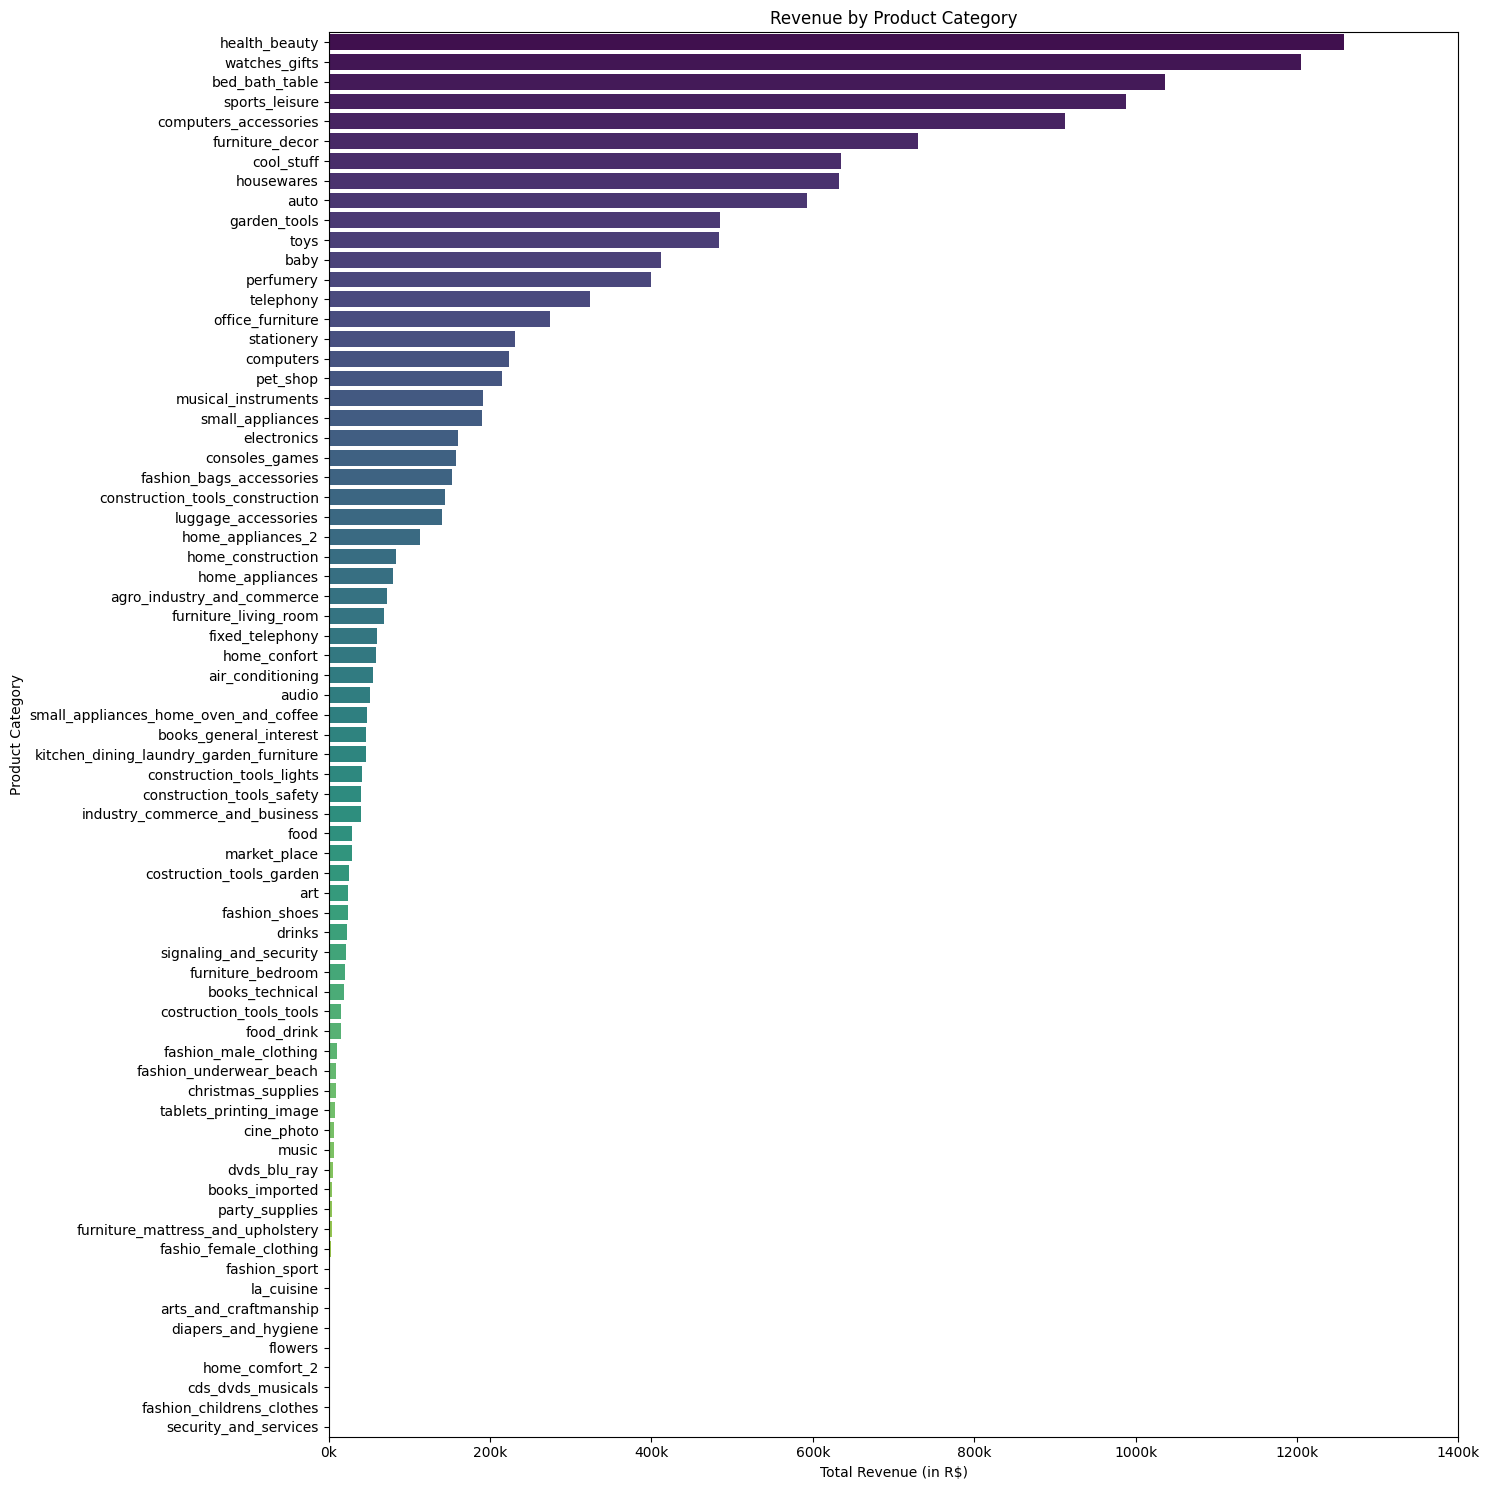

In [12]:
# Revenue by Category Analysis

#Load Dataframes
products_df = pd.read_csv("products_dataset.csv")
translations_df = pd.read_csv("product_category_name_translation.csv")
order_items_df = pd.read_csv("order_items_dataset.csv")

# Merge datasets
merged_products = pd.merge(order_items_df, products_df, on="product_id", how="left")
merged_products = pd.merge(merged_products, translations_df, on="product_category_name", how="left")

# Group by product category (in English) and sum the prices
revenue_by_category = merged_products.groupby("product_category_name_english")["price"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(15, 15))
sns.barplot(y=revenue_by_category.index, x=revenue_by_category.values, palette="viridis")
plt.title('Revenue by Product Category')
plt.xlabel('Total Revenue (in R$)')
plt.ylabel('Product Category')

# Adjust x-tick labels
ticks = plt.xticks()[0]
labels = [f"{int(tick/1000)}k" for tick in ticks]
plt.xticks(ticks, labels)

plt.tight_layout()
plt.show()

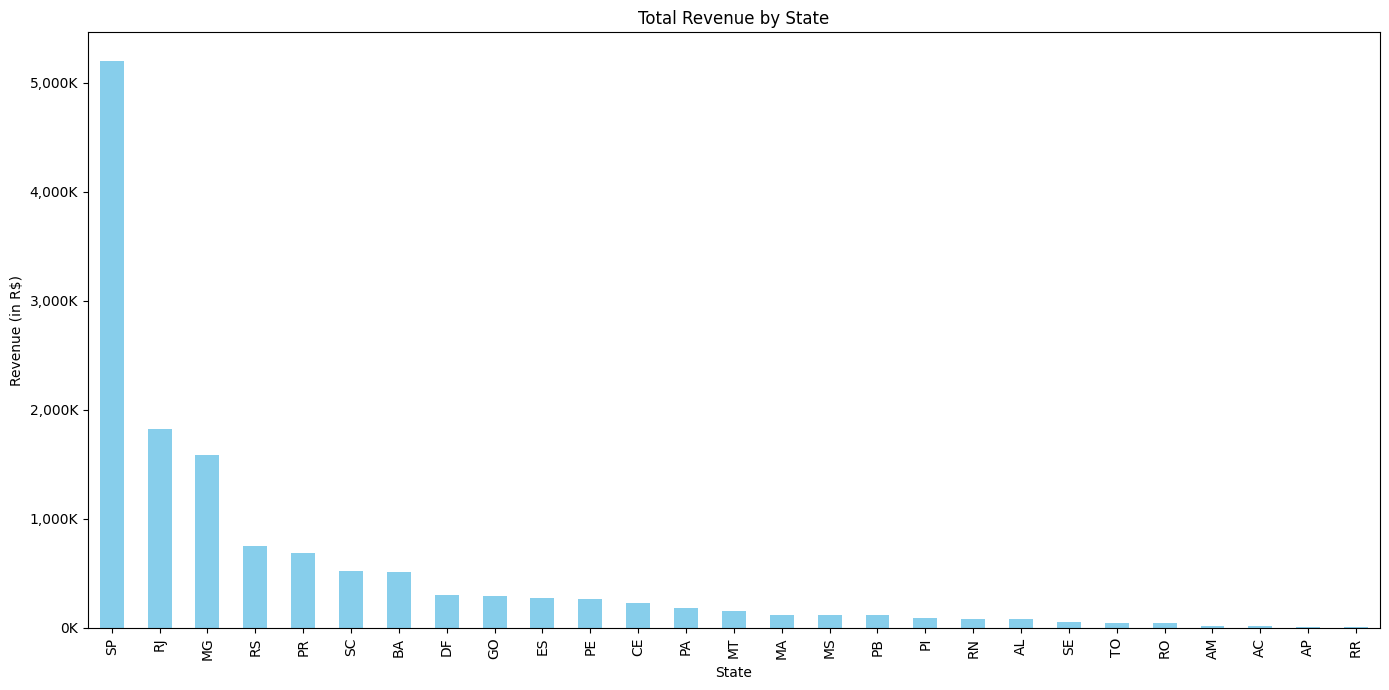

In [13]:
orders_df = pd.read_csv('orders_dataset.csv')

# Merge order_items with orders to get the customer_id for each order_id
merged_with_orders = pd.merge(order_items, orders_df, on='order_id', how='inner')

# Merge the above result with the customers DataFrame using customer_id
final_merged_data = pd.merge(merged_with_orders, customers, on='customer_id', how='inner')

# Calculate total revenue by state
revenue_by_state = final_merged_data.groupby('customer_state')['price'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14,7))
revenue_by_state.plot(kind='bar', color='skyblue')

plt.title('Total Revenue by State')
plt.ylabel('Revenue (in R$)')
plt.xlabel('State')

# Adjust the y-axis ticks to display in terms of hundreds of thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [15]:
# Calculate the total revenue
total_revenue = merged_data['price'].sum()

# Calculate the total freight cost
total_freight_cost = merged_data['freight_value'].sum()

# Print the results
print(f"Total Revenue: R${total_revenue:,.2f}")
print(f"Total Freight Cost: R${total_freight_cost:,.2f}")

Total Revenue: R$14,273,699.65
Total Freight Cost: R$2,370,031.65


**Review Score x Delivery Time Correlation Analysis**

In [16]:
# Load datasets
orders_data = pd.read_csv('orders_dataset.csv')
reviews_data = pd.read_csv('order_reviews_dataset.csv')

# Merge the datasets
merged_data = pd.merge(orders_data, reviews_data, on='order_id', how='inner')

# Filter orders with status 'delivered'
delivered_orders = orders[orders['order_status'] == 'delivered'].copy()

# Convert date columns to datetime format
delivered_orders['order_approved_at'] = pd.to_datetime(delivered_orders['order_approved_at'])
delivered_orders['order_delivered_customer_date'] = pd.to_datetime(delivered_orders['order_delivered_customer_date'])

# Calculate the delivery duration in days
delivered_orders['delivery_duration'] = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_approved_at']).dt.days

# Assuming you've read the olist_order_reviews_dataset.csv into a DataFrame named reviews
merged_data = delivered_orders.merge(reviews_data[['order_id', 'review_score']], on='order_id', how='inner')

# Compute correlation
correlation = merged_data['delivery_duration'].corr(merged_data['review_score'])

print(f"Correlation between delivery time and customer reviews: {correlation:.2f}")

Correlation between delivery time and customer reviews: -0.33


**Avarage Delivery Time by Customer's State Visualization**

From the "Average Delivery Time by State" bar chart, we can discern several insights about the distribution of delivery durations across different states:

1. Variability in Delivery Time: The delivery time varies significantly across states. Some states experience notably longer average delivery times, while others benefit from quicker delivery services.

2. Geographic Implications: Typically, states that are farther from distribution centers or main logistic routes may have longer delivery times. This could be due to logistical challenges such as transport availability, road infrastructure, or geographic barriers.

3. Operational Efficiency: Differences in delivery times might also be indicative of the operational efficiency of the sellers or shipping partners catering to particular regions. States with quicker delivery times could be serviced by more efficient or better-equipped sellers and shippers.

4. Customer Experience: States with prolonged delivery durations might have customers who are more prone to dissatisfaction due to the wait. Conversely, states with shorter delivery times could witness higher customer satisfaction rates, as we've seen from the negative correlation between delivery time and review scores.

5. Potential for Business Strategy: For e-commerce businesses, this chart can be invaluable. Recognizing which states have extended delivery durations can inform strategies for improvement. For instance, businesses might consider opening additional distribution centers in states with longer delivery times or partnering with local delivery services to optimize the delivery process.

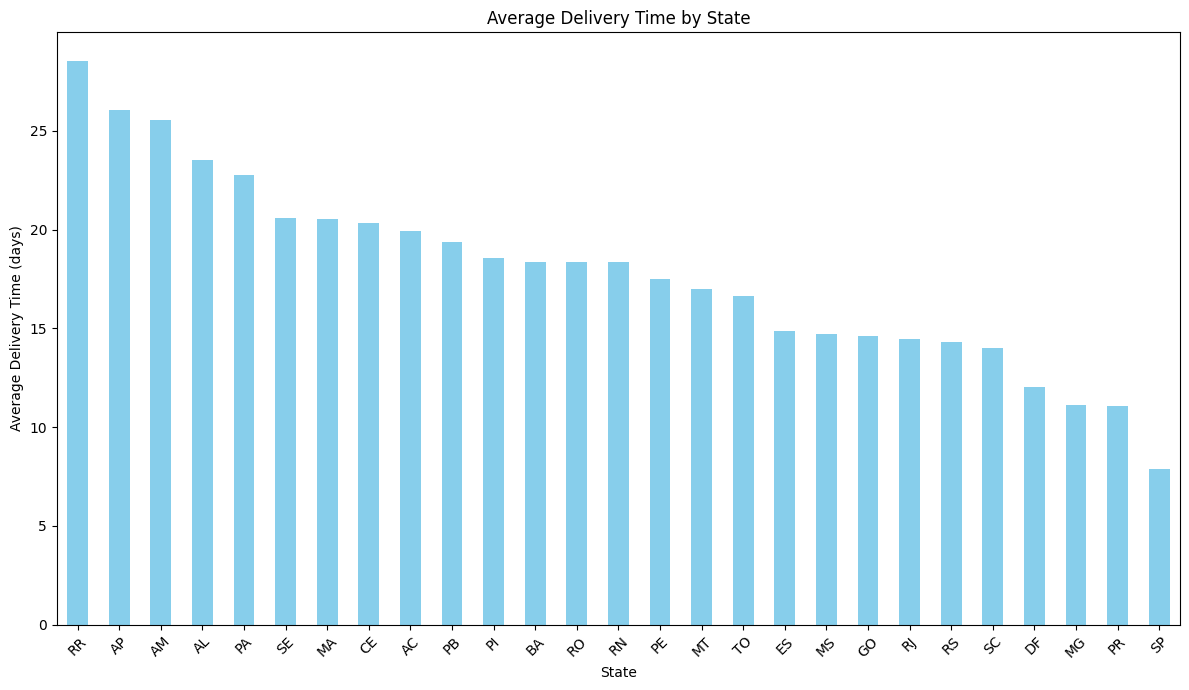

In [17]:
# Load the dataset
customers_df = pd.read_csv('customers_dataset.csv')

# Now, merge the datasets based on customer_id
merged_df = pd.merge(delivered_orders, customers_df[['customer_id', 'customer_state']], on='customer_id', how='inner')

# Calculate the average delivery duration by state
avg_delivery_by_state = merged_df.groupby('customer_state')['delivery_duration'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 7))
avg_delivery_by_state.plot(kind='bar', color='skyblue')
plt.title('Average Delivery Time by State')
plt.xlabel('State')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Customers Analysis**

RFM (Recency, Frequency, Monetary) Analysis
The RFM analysis (Recency, Frequency, Monetary) is a pivotal technique in direct marketing and customer relationship management.

It segments customers based on three criteria: the recency of their last purchase, the frequency of their purchases, and the total amount spent. This segmentation allows businesses to pinpoint their most valuable customers and tailor communication strategies accordingly.

By understanding customer purchasing behavior, companies can optimize resources, enhance retention, and maximize the ROI of their campaigns, ensuring more pertinent offers for each segment.

In [18]:
# Load datasets
customers_df = pd.read_csv('customers_dataset.csv')
order_items_df = pd.read_csv('order_items_dataset.csv')
orders_df = pd.read_csv('orders_dataset.csv')

# Ensure the 'order_approved_at' column is a datetime object
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])

# Merging the datasets
merged_df = pd.merge(orders_df, order_items_df, on='order_id', how='left')
merged_df = pd.merge(merged_df, customers_df, on='customer_id', how='left')

# Convert order_approved_at to datetime format
merged_df['order_approved_at'] = pd.to_datetime(merged_df['order_approved_at'])

# Get the most recent date in the dataset + 1 day (to use as a reference)
last_date = merged_df['order_approved_at'].max() + pd.Timedelta(days=1)

# Calculate Recency
recency_df = merged_df.groupby('customer_unique_id').agg(last_purchase=('order_approved_at', 'max'))
recency_df['Recency'] = (last_date - recency_df['last_purchase']).dt.days

# Calculate Frequency
frequency_df = merged_df.groupby('customer_unique_id').agg(Frequency=('order_id', 'nunique'))

# Calculate Monetary value
monetary_df = merged_df.groupby('customer_unique_id').agg(Monetary=('price', 'sum'))

# Merge all dataframes together
rfm_df = pd.concat([recency_df, frequency_df, monetary_df], axis=1)

# Drop the last_purchase column as it was an intermediate step to get Recency
rfm_df.drop(columns='last_purchase', inplace=True)

In [19]:
# Define the 'now' point as one day after the latest order in the dataset
now = merged_df['order_approved_at'].max() + pd.Timedelta(days=1)

# Recency: Days since last purchase
recency = merged_df.groupby('customer_unique_id')['order_approved_at'].max().reset_index()
recency.columns = ['customer_unique_id', 'LastPurchaseDate']
recency['Recency'] = (now - recency['LastPurchaseDate']).dt.days

# Frequency: Number of purchases
frequency = merged_df.groupby('customer_unique_id')['order_id'].count().reset_index()
frequency.columns = ['customer_unique_id', 'Frequency']

# Monetary: Total money spent
monetary = merged_df.groupby('customer_unique_id')['price'].sum().reset_index()
monetary.columns = ['customer_unique_id', 'Monetary']

# Merge recency, frequency and monetary dataframes
rfm = pd.merge(recency, frequency, on='customer_unique_id')
rfm = pd.merge(rfm, monetary, on='customer_unique_id')

# Display the top rows
print(rfm.head())
print(rfm.describe())

                 customer_unique_id    LastPurchaseDate  Recency  Frequency  \
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 11:11:18    117.0          1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 18:25:44    119.0          1   
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03    542.0          1   
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:49:17    326.0          1   
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 20:06:52    293.0          1   

   Monetary  
0    129.90  
1     18.90  
2     69.00  
3     25.99  
4    180.00  
            Recency     Frequency      Monetary
count  95997.000000  96096.000000  96096.000000
mean     244.250904      1.180330    141.438184
std      153.282280      0.620748    217.215904
min        1.000000      1.000000      0.000000
25%      120.000000      1.000000     45.990000
50%      225.000000      1.000000     89.000000
75%      354.000000      1.000000    154.000000
max      719.000000     24.000000  13440.000000


**Histograms Visualization for RFM analysis complemented by a Kernel Density Estimate (KDE) overlay. **

From the plots we can get some insight:

1. Recency Distribution:

a. Insights about how recently most of the customers have made purchases can be drawn.

b. Peaks indicate the most common recency intervals.

c. If a significant peak is towards lower values, it indicates that a substantial portion of customers have purchased recently.

2. Frequency Distribution:

a. Shows the number of times most customers have made purchases.

b. Peaks highlight the most typical purchase frequencies.

c. If most customers have low frequencies, it might indicate a large pool of one-time purchasers. High frequencies signal a group of loyal customers.

3. Monetary Distribution:

a. Represents the total monetary value contributed by customers.

b. Peaks show the most common spending brackets.

c. If the distribution skews towards higher values, it suggests that many customers spend a significant amount.

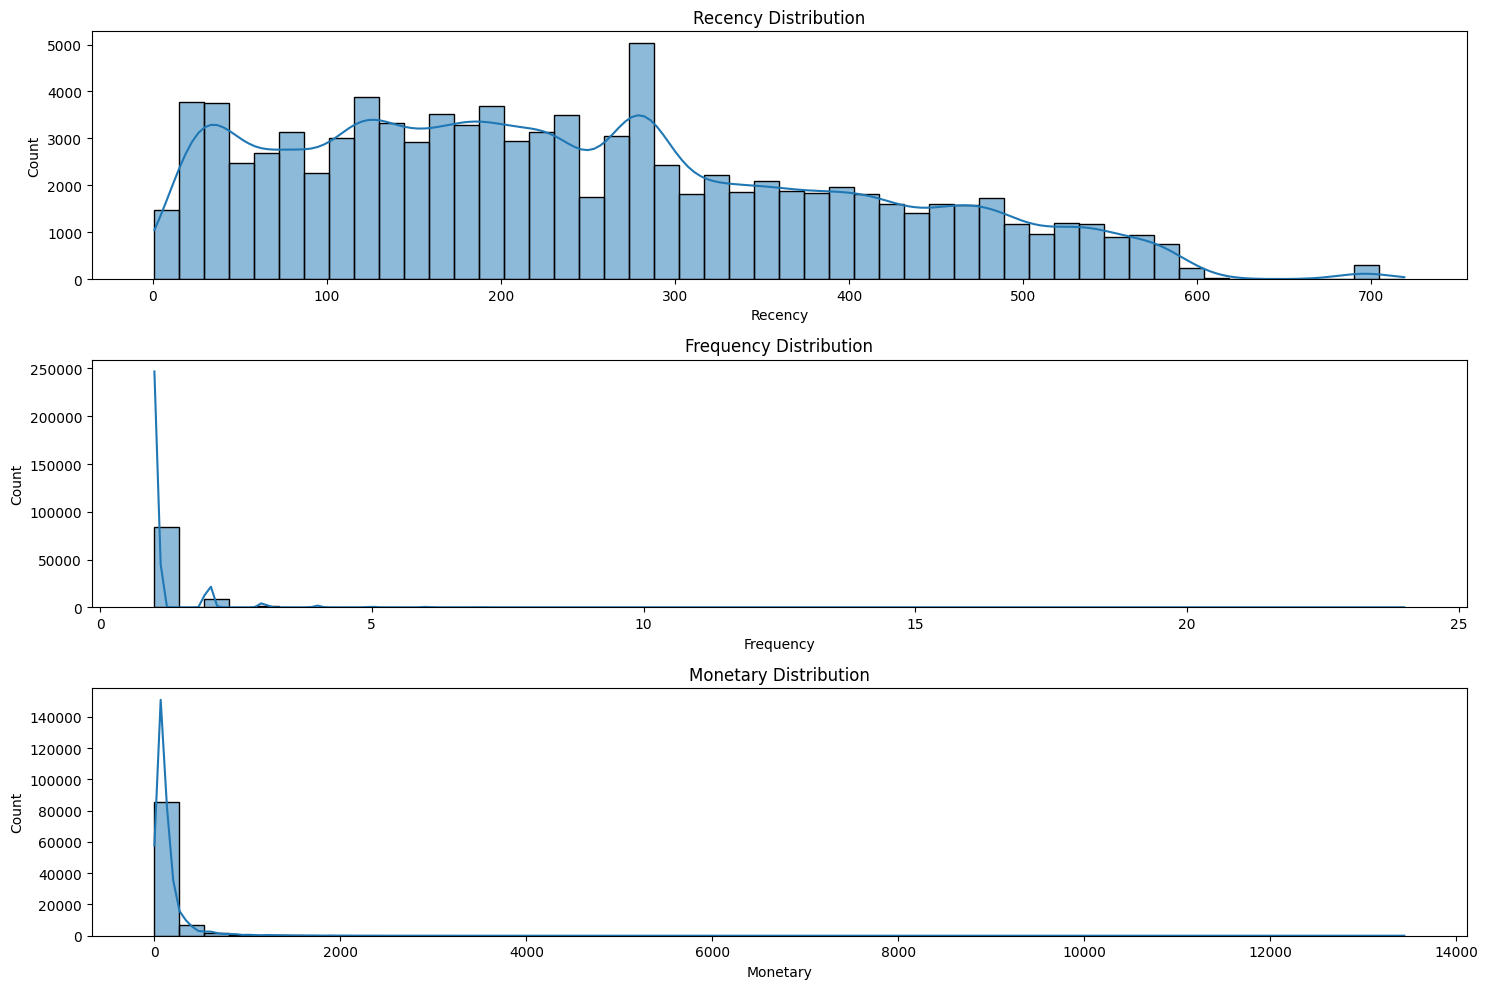

In [20]:
# Set up the matplotlib figure
f, axes = plt.subplots(3, 1, figsize=(15, 10))

# Plot the distributions
sns.histplot(rfm['Recency'], bins=50, ax=axes[0], kde=True).set_title('Recency Distribution')
sns.histplot(rfm['Frequency'], bins=50, ax=axes[1], kde=True).set_title('Frequency Distribution')
sns.histplot(rfm['Monetary'], bins=50, ax=axes[2], kde=True).set_title('Monetary Distribution')

plt.tight_layout()
plt.show()